In [127]:
from typing import List

import matplotlib.pyplot as plt
import pandas as pd

import config

In [128]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [129]:
def plot_electricity_load(true_values: any, predicted_values: any) -> None:
    plt.figure(figsize=(10, 6))
    plt.plot(true_values, label='True Values')

    for i in range(config.nTrial):
        plt.plot(predicted_values.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Electricity load [MW]')
    plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [130]:
def plot_electricity_load_by_mean_max_min(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.epoch)

    # sampling time points
    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    sampled_mean_values = mean_values[sampled_time_points]

    max_values = predicted_values.max(axis=1)
    min_values = predicted_values.min(axis=1)

    sampled_max_values = max_values[sampled_time_points]
    sampled_min_values = min_values[sampled_time_points]

    plt.plot(sampled_time_points, sampled_mean_values, marker='^', linestyle='-', color='blue', label='Mean')
    plt.plot(sampled_time_points, sampled_max_values, marker='_', linestyle='', color='red', label='Max')
    plt.plot(sampled_time_points, sampled_min_values, marker='_', linestyle='', color='green', label='Min')
    plt.plot(true_values, color='black', label='True Values')

    for t in sampled_time_points:
        plt.plot([t, t], [sampled_min_values[t], sampled_max_values[t]], linestyle='-', color='gray')

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()


In [131]:
def plot_electricity_load_by_mean_std(true_values: any, predicted_values: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    time_points = range(config.start, config.epoch)

    sampled_time_points = time_points[::sampling_interval]

    mean_values = predicted_values.mean(axis=1)
    std_values = predicted_values.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]


    plt.plot(sampled_time_points, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Mean')

    plt.errorbar(sampled_time_points, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Electricity load [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [132]:
def plot_total_prediction_error(error_abs_value: any) -> None:
    plt.figure(figsize=(10, 6))

    x_values = [i for i in range(config.start, config.epoch)]

    for i in range(config.nTrial):
        plt.plot(x_values, error_abs_value.iloc[:, i], label=f'Prediction {i+1}')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error [MW]')
    # plt.title('Electricity Consumption Prediction')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()

In [133]:
def plot_total_prediction_error_by_mean_std(error_abs_value: any, sampling_interval: int) -> None:
    plt.figure(figsize=(10, 6))

    # TODO: fix this error epoch start and end
    x_values = range(config.start, config.epoch)
    sampled_x_values = x_values[::sampling_interval]

    time_points = range(config.error_abs_start, config.error_abs_end)

    sampled_time_points = time_points[::sampling_interval]

    mean_values = error_abs_value.mean(axis=1)
    std_values = error_abs_value.std(axis=1)

    sampled_mean_values = mean_values[sampled_time_points]
    sampled_std_values = std_values[sampled_time_points]

    # TODO: fix this error epoch start and end
    plt.plot(sampled_x_values, sampled_mean_values, marker='^', markersize=6, linestyle='-', color='blue', label='Mean')
    # TODO: fix this error epoch start and end
    plt.errorbar(sampled_x_values, sampled_mean_values, yerr=sampled_std_values, fmt='_', color='red', elinewidth=1, capsize=3)

    plt.xlabel('Time Step t')
    plt.ylabel('Prediction error [MW]')
    plt.legend(bbox_to_anchor=(1.02, 1.00), loc='upper left', borderaxespad=0, fontsize=10)
    plt.show()
    

In [134]:
def calculate_mae(error_abs_value: any) -> float:
    total_absolute_errors = error_abs_value.sum(axis=0)
    mae = total_absolute_errors.mean()
    return mae

In [135]:
print(config.ROOT_PATH)

/home/zhangqiang/work/repos/time-series/utils


## Conventional CLA result

In [136]:
df = load_csv_data(config.predict_results_path)
df.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [137]:
df.tail()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
829826,414911,NaN,NaN,221.7490,18.6204,221.749,221.7490,161.1140,221.7490,221.7490,161.1140,221.749,60.1706,NaN
829827,414912,NaN,NaN,164.4630,32.8294,164.463,32.8294,32.8294,254.1140,254.1140,32.8294,142.034,32.8294,NaN
829828,414913,NaN,NaN,192.7040,257.9130,192.704,126.2790,21.0334,192.7040,192.7040,192.7040,235.484,192.7040,NaN
829829,414914,NaN,NaN,72.3666,178.7310,39.132,49.2185,72.3666,72.3666,72.3666,72.3666,178.731,178.7310,NaN
829830,414915,NaN,NaN,47.4579,284.2810,66.418,284.2810,196.3320,47.4579,196.3320,91.1235,284.281,196.3320,NaN


In [138]:
df.iloc[414911:414920]

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
414911,414912,5926.45,NaN,5997.9100,5866.2800,5997.9100,5866.2800,5866.2800,6087.5600,6087.5600,5866.2800,5975.4800,5866.2800,NaN
414912,414913,5833.45,NaN,5932.7000,5997.9100,5932.7000,5866.2800,5718.9700,5932.7000,5932.7000,5932.7000,5975.4800,5932.7000,NaN
414913,414914,5740.00,NaN,5718.9700,5825.3300,5607.4700,5695.8200,5718.9700,5718.9700,5718.9700,5718.9700,5825.3300,5825.3300,NaN
414914,414915,5646.60,NaN,5588.5100,5825.3300,5607.4700,5825.3300,5737.3800,5588.5100,5737.3800,5632.1700,5825.3300,5737.3800,NaN
414915,414916,5541.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414916,1,NaN,NaN,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,77.0292,NaN
414917,2,NaN,NaN,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,47.8874,NaN
414918,3,NaN,NaN,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,47.0958,NaN
414919,4,NaN,NaN,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,95.0500,NaN


In [139]:
true_values = df["TRUE"][config.start+1:config.epoch+1]
true_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [140]:
predicted_column = list(map(lambda x: str(x), range(1, config.nTrial+1)))
predicted_values = df[predicted_column][config.start:config.epoch]
predicted_values

,1,2,3,4,5,6,7,8,9,10
414819,5695.82,5695.82,5564.04,5564.04,5695.82,5695.82,5695.82,5695.82,5564.04,5695.82
414820,5564.04,5564.04,5420.50,5564.04,5420.50,5420.50,5400.02,5564.04,5564.04,5564.04
414821,5291.33,5564.04,5291.33,5291.33,5420.50,5420.50,5291.33,5420.50,5291.33,5420.50
414822,5420.50,5379.15,5379.15,5420.50,5379.15,5351.00,5420.50,5420.50,5420.50,5420.50
414823,5292.09,5379.15,5292.09,5292.09,5379.15,5292.09,5292.09,5292.09,5292.09,5292.09
...,...,...,...,...,...,...,...,...,...,...
414910,6148.20,5907.83,6148.20,6148.20,6087.56,6148.20,6148.20,6087.56,6148.20,5866.28
414911,5997.91,5866.28,5997.91,5866.28,5866.28,6087.56,6087.56,5866.28,5975.48,5866.28
414912,5932.70,5997.91,5932.70,5866.28,5718.97,5932.70,5932.70,5932.70,5975.48,5932.70
414913,5718.97,5825.33,5607.47,5695.82,5718.97,5718.97,5718.97,5718.97,5825.33,5825.33


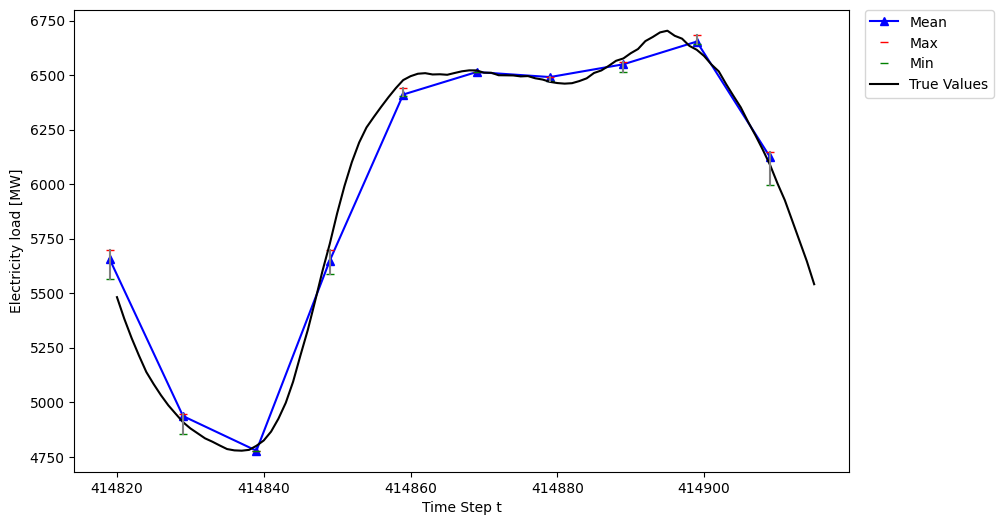

In [141]:
plot_electricity_load_by_mean_max_min(true_values, predicted_values, 10)

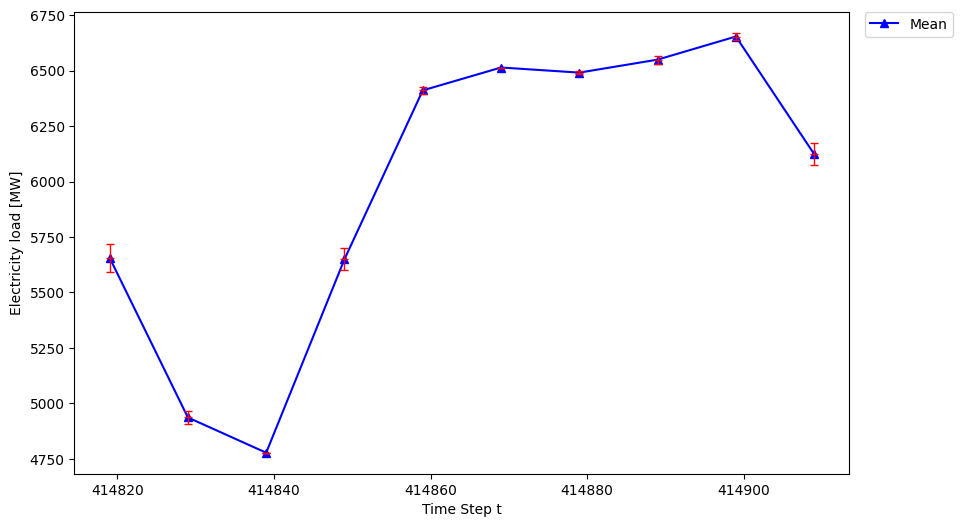

In [142]:
plot_electricity_load_by_mean_std(true_values, predicted_values, 10)

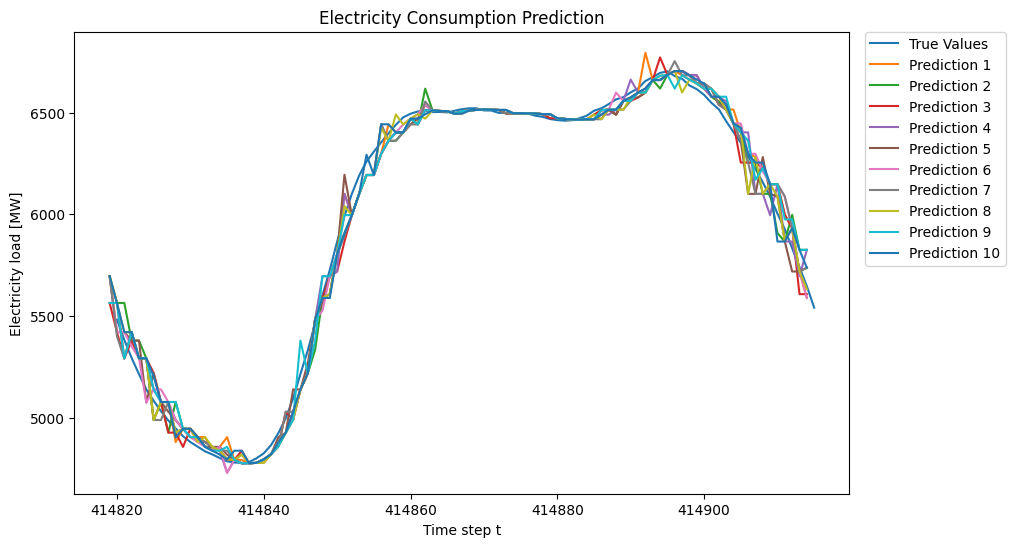

In [143]:
plot_electricity_load(true_values, predicted_values)

In [144]:
# abs(outputdata[n][a] - inputdata[a+1])
error_abs_value = df[predicted_column][config.error_abs_start:config.error_abs_end]
error_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,85.23660,256.4290,256.42900,256.42900,256.4290,321.0800,321.08000,256.4290,256.42900,256.4290
829735,214.09300,214.0930,82.31010,82.31010,214.0930,214.0930,214.09300,214.0930,82.31010,214.0930
829736,181.66000,181.6600,38.12560,181.66000,38.1256,38.1256,17.64610,181.6600,181.66000,181.6600
829737,2.54374,270.1600,2.54374,2.54374,126.6260,126.6260,2.54374,126.6260,2.54374,126.6260
829738,206.77600,165.4290,165.42900,206.77600,165.4290,137.2730,206.77600,206.7760,206.77600,206.7760
...,...,...,...,...,...,...,...,...,...,...
829825,144.82400,97.3783,144.82400,7.80274,97.3783,144.8240,144.82400,144.8240,144.82400,144.8240
829826,221.74900,18.6204,221.74900,221.74900,161.1140,221.7490,221.74900,161.1140,221.74900,60.1706
829827,164.46300,32.8294,164.46300,32.82940,32.8294,254.1140,254.11400,32.8294,142.03400,32.8294
829828,192.70400,257.9130,192.70400,126.27900,21.0334,192.7040,192.70400,192.7040,235.48400,192.7040


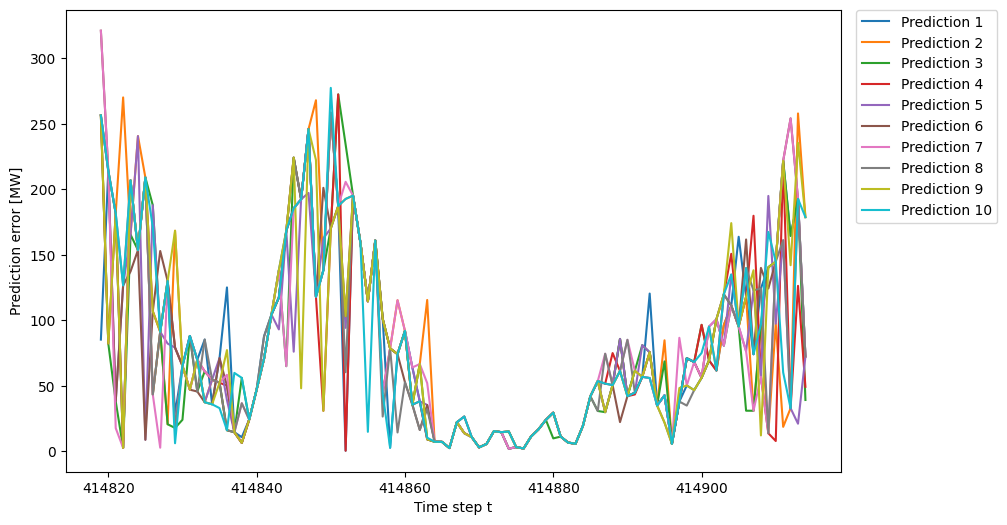

In [145]:
plot_total_prediction_error(error_abs_value)

In [146]:
mae = calculate_mae(error_abs_value)
print("MAE:", mae)

MAE: 7559.400758600001


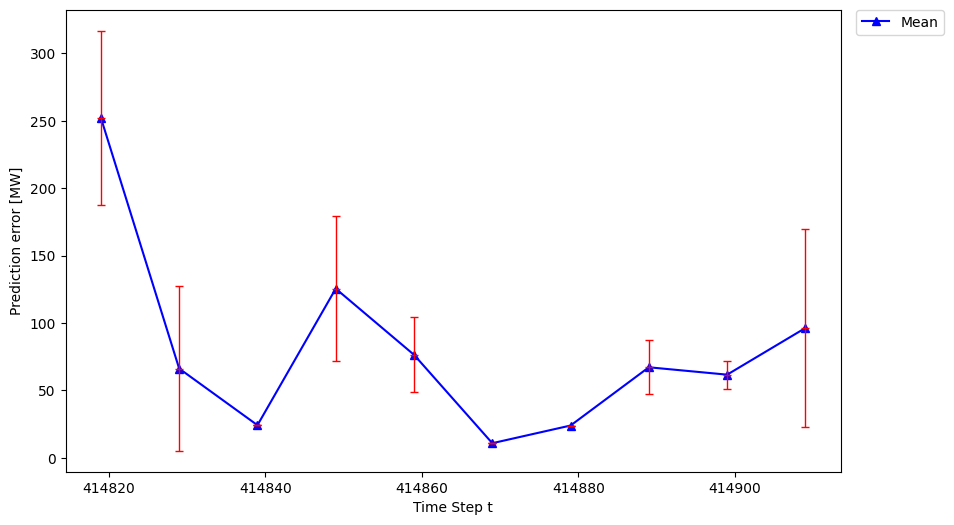

In [147]:
plot_total_prediction_error_by_mean_std(error_abs_value, 10)

## Inf result

In [148]:
df_inf = load_csv_data(config.predict_inf_results_path)
df_inf.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4854.40,NaN,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,4854.40,NaN
1,2,4777.37,NaN,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,4777.37,NaN
2,3,4729.48,NaN,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,4729.48,NaN
3,4,4682.39,NaN,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,4682.39,NaN
4,5,4587.34,NaN,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,4587.34,NaN


In [149]:
true_inf_values = df_inf["TRUE"][config.start+1:config.epoch+1]
true_inf_values

414820    5481.73
414821    5382.38
414822    5293.88
414823    5213.73
414824    5138.55
           ...   
414911    5926.45
414912    5833.45
414913    5740.00
414914    5646.60
414915    5541.05
Name: TRUE, Length: 96, dtype: float64

In [150]:
predicted_inf_values = df_inf[predicted_column][config.start:config.epoch]
predicted_inf_values

,1,2,3,4,5,6,7,8,9,10
414819,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72,5738.72
414820,5693.13,5693.13,5693.13,5693.13,5177.34,5693.13,5693.13,5693.13,5693.13,5693.13
414821,5469.60,5177.34,5693.13,5469.60,5177.34,5177.34,5469.60,5693.13,5469.60,5469.60
414822,5443.43,5443.43,5443.43,4931.10,5443.43,5443.43,5443.43,5443.43,5443.43,5443.43
414823,4931.10,5443.43,4931.10,4931.10,4931.10,4931.10,5212.30,5212.30,5443.43,4931.10
...,...,...,...,...,...,...,...,...,...,...
414910,5738.56,6043.29,6262.61,6262.61,5738.56,6043.29,6262.61,6043.29,5738.56,5738.56
414911,6262.61,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32,6031.32
414912,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5999.86,5999.86,5999.86,5999.86
414913,5999.86,5426.04,5426.04,5999.86,5999.86,5426.04,5426.04,5767.03,5767.03,5426.04


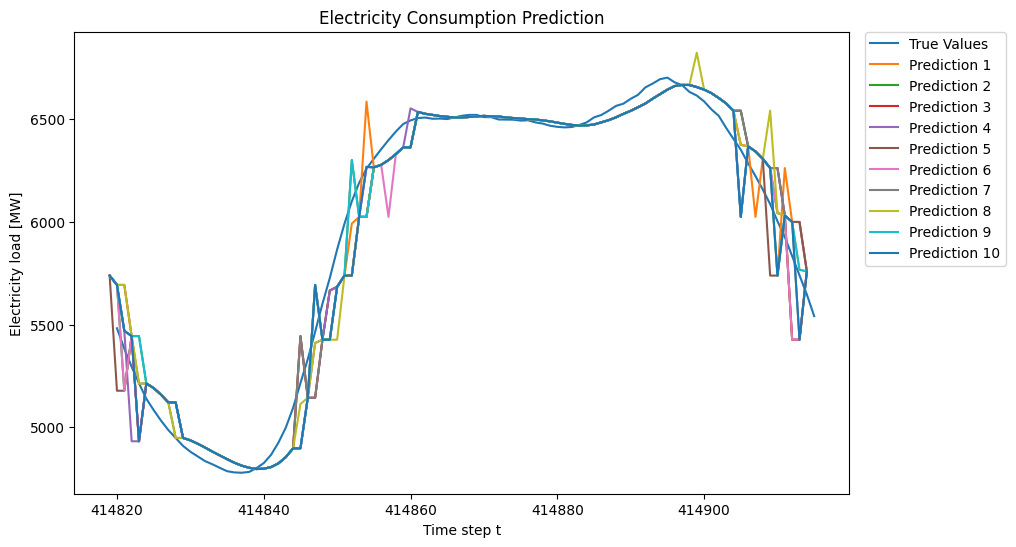

In [151]:
plot_electricity_load(true_inf_values, predicted_inf_values)

In [152]:
# abs(outputdata[n][a] - inputdata[a+1])
error_inf_abs_value = df_inf[predicted_column][config.error_abs_start:config.error_abs_end]
error_inf_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,405.518,122.342,405.518,405.518,122.342,405.518,405.518,122.342,405.518,405.518
829735,256.999,256.999,256.999,256.999,256.999,256.999,256.999,256.999,256.999,256.999
829736,310.757,310.757,310.757,310.757,205.031,310.757,310.757,310.757,310.757,310.757
829737,175.728,116.531,399.257,175.728,116.531,116.531,175.728,399.257,175.728,175.728
829738,229.710,229.710,229.710,282.620,229.710,229.710,229.710,229.710,229.710,229.710
...,...,...,...,...,...,...,...,...,...,...
829825,259.239,259.239,259.239,259.239,264.815,259.239,259.239,538.717,259.239,259.239
829826,187.890,116.841,336.164,336.164,187.890,116.841,336.164,116.841,187.890,187.890
829827,429.164,197.866,197.866,197.866,197.866,197.866,197.866,197.866,197.866,197.866
829828,259.856,313.963,313.963,259.856,259.856,313.963,259.856,259.856,259.856,259.856


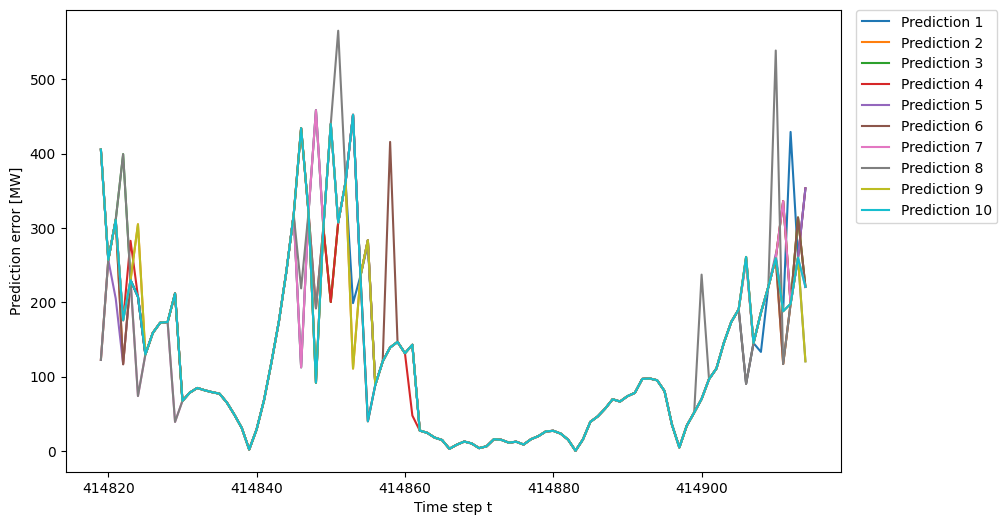

In [153]:
plot_total_prediction_error(error_inf_abs_value)

In [154]:
mae = calculate_mae(error_inf_abs_value)
print("MAE:", mae)

MAE: 11751.035933000001


## 100

In [155]:
df_100 = load_csv_data(config.predict_100_results_path)
df_100.head()

,Unnamed: 0,TRUE,Unnamed: 2,1,2,3,4,5,6,7,8,9,10,Unnamed: 13
0,1,4849.61,NaN,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,4849.61,NaN
1,2,4783.67,NaN,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,4783.67,NaN
2,3,4739.70,NaN,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,4739.70,NaN
3,4,4673.76,NaN,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,4673.76,NaN
4,5,4585.83,NaN,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,4585.83,NaN


In [156]:
true_100_values = df_100["TRUE"][config.start+1:config.epoch+1]
true_100_values

414820    5487.09
414821    5377.18
414822    5289.25
414823    5223.31
414824    5135.38
           ...   
414911    5926.73
414912    5838.81
414913    5750.88
414914    5640.97
414915    5531.06
Name: TRUE, Length: 96, dtype: float64

In [157]:
predicted_100_values = df_100[predicted_column][config.start:config.epoch]
predicted_100_values

,1,2,3,4,5,6,7,8,9,10
414819,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93,5684.93
414820,5597.00,5421.15,5684.93,5640.97,5553.04,5684.93,5553.04,5553.04,5553.04,5421.15
414821,5553.04,5421.15,5487.09,5487.09,5487.09,5553.04,5553.04,5553.04,5553.04,5421.15
414822,5377.18,5377.18,5179.34,5377.18,5377.18,5421.15,5421.15,5421.15,5421.15,5487.09
414823,5289.25,5289.25,5113.40,5289.25,5289.25,5135.38,5355.20,5289.25,5289.25,5289.25
...,...,...,...,...,...,...,...,...,...,...
414910,6080.61,5860.79,5904.75,5904.75,6080.61,5860.79,6102.59,6080.61,6102.59,6102.59
414911,5992.68,5860.79,5860.79,5992.68,5860.79,5860.79,5860.79,5992.68,5860.79,5860.79
414912,5728.90,5728.90,5794.84,5926.73,5926.73,5926.73,5728.90,5926.73,5926.73,5926.73
414913,5728.90,5728.90,5838.81,5926.73,5728.90,5838.81,5728.90,5838.81,5838.81,5926.73


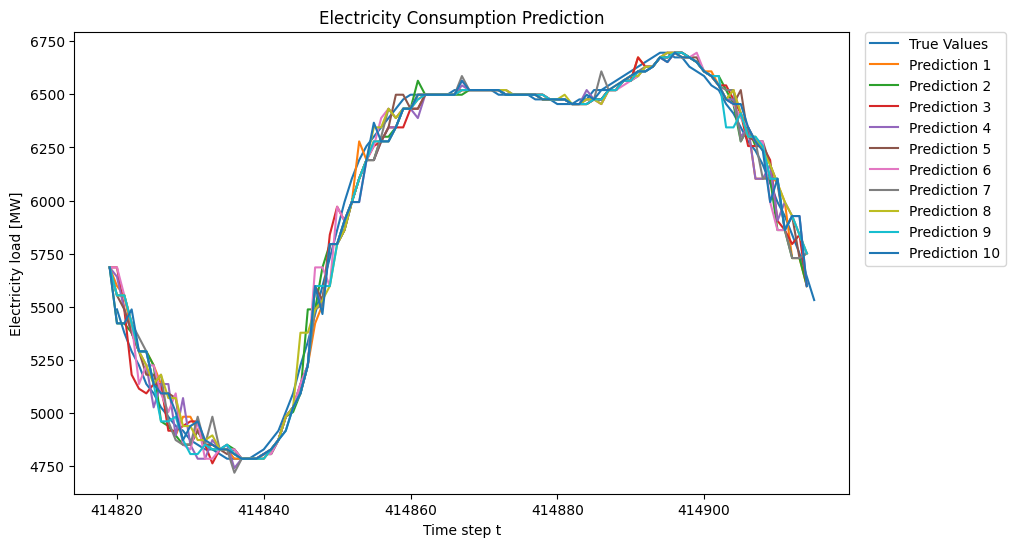

In [158]:
plot_electricity_load(true_100_values, predicted_100_values)

In [159]:
# abs(outputdata[n][a] - inputdata[a+1])
error_100_abs_value = df_100[predicted_column][config.error_abs_start:config.error_abs_end]
error_100_abs_value

,1,2,3,4,5,6,7,8,9,10
829734,241.802,197.838,197.838,197.838,197.838,197.838,241.802,197.838,21.982,197.838
829735,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838,197.838
829736,219.820,43.964,307.748,263.784,175.856,307.748,175.856,175.856,175.856,43.964
829737,263.784,131.892,197.838,197.838,197.838,263.784,263.784,263.784,263.784,131.892
829738,153.874,153.874,43.964,153.874,153.874,197.838,197.838,197.838,197.838,263.784
...,...,...,...,...,...,...,...,...,...,...
829825,131.892,109.910,197.838,175.856,175.856,0.000,109.910,175.856,109.910,0.000
829826,153.874,65.946,21.982,21.982,153.874,65.946,175.856,153.874,175.856,175.856
829827,153.874,21.982,21.982,153.874,21.982,21.982,21.982,153.874,21.982,21.982
829828,21.982,21.982,43.964,175.856,175.856,175.856,21.982,175.856,175.856,175.856


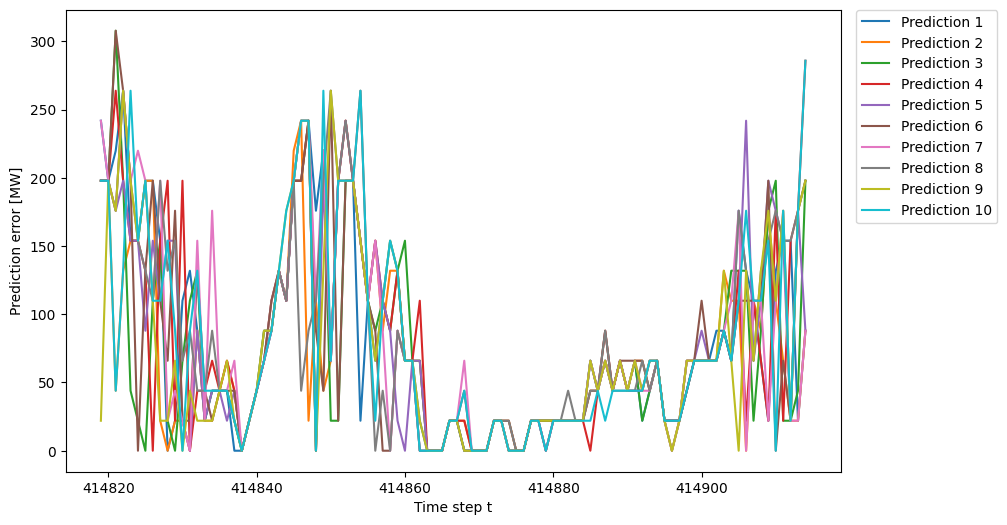

In [160]:
plot_total_prediction_error(error_100_abs_value)

In [161]:
mae = calculate_mae(error_100_abs_value)
print("MAE:", mae)

MAE: 7418.9250000000075
